In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 8.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

# Create a DataFrame with consistent data for fish and bacteria populations
data = pd.DataFrame({
    'Year': range(2010, 2021),
    'Fish Population': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],
    'Bacteria Population': [5000, 5200, 5300, 5500, 5800, 6000, 6200, 6400, 6600, 7000, 7200],
    'Temperature (Celsius)': [25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 31],
    'pH Level': [7.2, 7.3, 7.4, 7.2, 7.5, 7.6, 7.2, 7.4, 7.3, 7.5, 7.4],
    'Dissolved Oxygen (mg/L)': [8, 7.5, 8.2, 8.1, 8.5, 7.9, 8.3, 8, 7.8, 8.6, 8.2]
})

# Convert the DataFrame to an HTML table
html_table = data.to_html(classes='table table-bordered table-striped', index=False, escape=False)

# Save the HTML table to a file (optional)
with open('data_table.html', 'w') as file:
    file.write(html_table)



In [6]:
from pandas import read_html

In [8]:
filename = 'data_table.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')

In [9]:

# Function to simulate interactions between fish and bacteria populations
def run_simulation(t_0, t_end, growth_func, initial_fish, initial_bacteria):
    fish_population_growth = [initial_fish]
    bacteria_population_growth = [initial_bacteria]

    for t in range(t_0, t_end):
        # Calculate the growth rates based on the other population
        fish_growth_rate = (bacteria_population_growth[t - 1] - bacteria_population_growth[t - 2]) / bacteria_population_growth[t - 2]
        bacteria_growth_rate = (fish_population_growth[t - 1] - fish_population_growth[t - 2]) / fish_population_growth[t - 2]

        # Calculate new population values using proportional growth
        new_fish_population = growth_func(fish_population_growth[t - 1], fish_growth_rate)
        new_bacteria_population = growth_func(bacteria_population_growth[t - 1], bacteria_growth_rate)

        fish_population_growth.append(new_fish_population)
        bacteria_population_growth.append(new_bacteria_population)

    return fish_population_growth, bacteria_population_growth

In [10]:
# Define a growth function
def proportional_growth(population, growth_rate):
    return population * (1 + growth_rate)

In [11]:
# Calculate the initial growth rates based on the initial populations
initial_fish = data['Fish Population'].iloc[0]
initial_bacteria = data['Bacteria Population'].iloc[0]

In [12]:
# Simulate population interaction
t_0 = 1
t_end = len(data)
fish_population_growth, bacteria_population_growth = run_simulation(t_0, t_end, proportional_growth, initial_fish, initial_bacteria)

In [13]:
# Create a new DataFrame with the calculated population growth
population_growth_data = pd.DataFrame({
    'Year': data['Year'],
    'Fish Population Growth': fish_population_growth,
    'Bacteria Population Growth': bacteria_population_growth
})

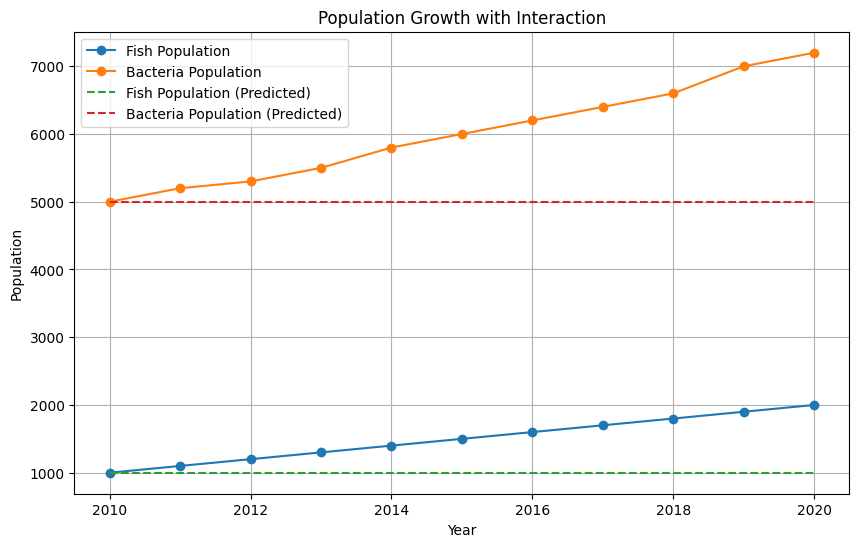

In [14]:
# Plot the population growth
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Fish Population'], label='Fish Population', marker='o')
plt.plot(data['Year'], data['Bacteria Population'], label='Bacteria Population', marker='o')
plt.plot(data['Year'], fish_population_growth, linestyle='--', label='Fish Population (Predicted)')
plt.plot(data['Year'], bacteria_population_growth, linestyle='--', label='Bacteria Population (Predicted)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth with Interaction')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
